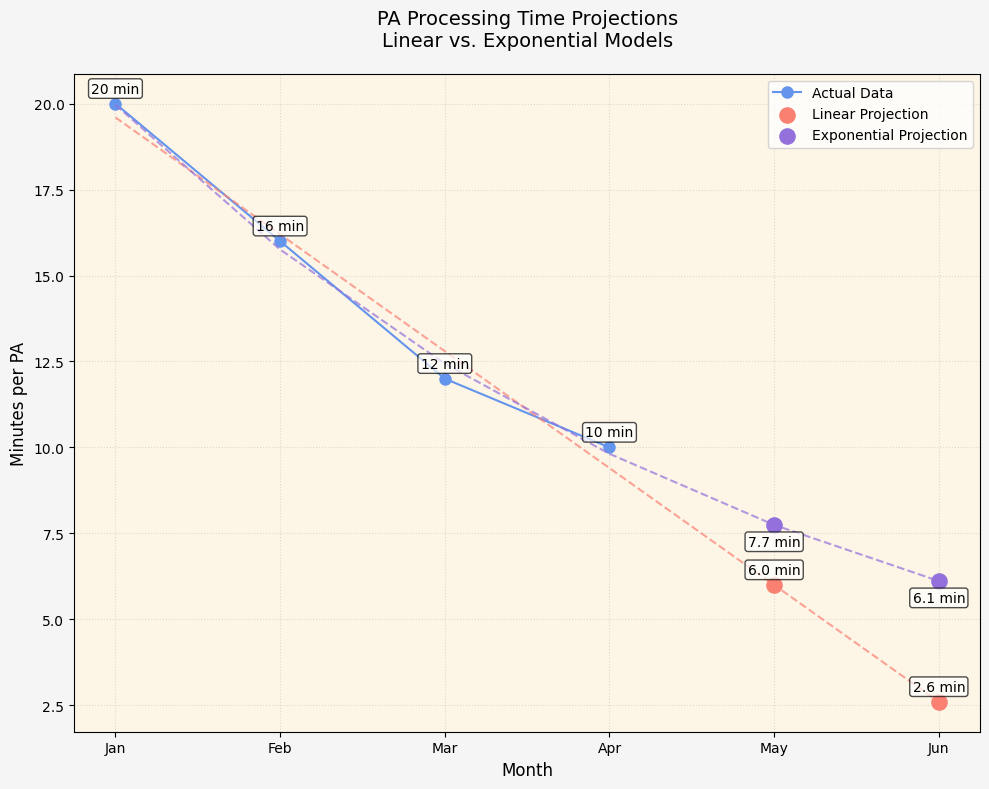


Projected Minutes per PA:
Linear model:    May 6.0 min  |  June 2.6 min
Exponential model: May 7.7 min  |  June 6.1 min


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data from the chart
months = np.array([1, 2, 3, 4])  # January=1 through April=4
minutes_per_pa = np.array([20, 16, 12, 10])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Reshape for sklearn
X = months.reshape(-1, 1)
y = minutes_per_pa

# Create and fit models
lin_model = LinearRegression().fit(X, y)
log_model = LinearRegression().fit(X, np.log(y))

# Predictions for May (5) and June (6)
future_X = np.array([5, 6]).reshape(-1, 1)
lin_pred = lin_model.predict(future_X)
exp_pred = np.exp(log_model.predict(future_X))

# Create plot with off-white background
plt.figure(figsize=(10, 8), facecolor='#f5f5f5')  # Off-white background
ax = plt.gca()
ax.set_facecolor('oldlace')  # Slightly lighter off-white for plot area

# Plot actual data with connecting line in cornflowerblue
plt.plot(months, minutes_per_pa, 'o-', 
         color='cornflowerblue',
         markersize=8, linewidth=1.5, 
         label='Actual Data')

# Add value labels to actual points
for i, (x, y) in enumerate(zip(months, minutes_per_pa)):
    plt.annotate(f"{y} min", (x, y), 
                xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

# Plot projections
plt.scatter([5, 6], lin_pred, color='salmon', s=120,
            label='Linear Projection', zorder=3)
plt.scatter([5, 6], exp_pred, color='mediumpurple', s=120,
            label='Exponential Projection', zorder=3)

# Add dashed trend lines
plt.plot(np.append(months, [5,6]), 
         lin_model.predict(np.append(X, future_X).reshape(-1,1)),
         '--', color='salmon', alpha=0.7)
plt.plot(np.append(months, [5,6]), 
         np.exp(log_model.predict(np.append(X, future_X).reshape(-1,1))),
         '--', color='mediumpurple', alpha=0.7)

# Add projection value labels with white backgrounds
for x, y in zip([5,6], lin_pred):
    plt.annotate(f"{y:.1f} min", (x, y), 
                xytext=(0, 8), textcoords='offset points',
                ha='center', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))
for x, y in zip([5,6], exp_pred):
    plt.annotate(f"{y:.1f} min", (x, y), 
                xytext=(0, -15), textcoords='offset points',
                ha='center', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.7))

# Formatting
plt.title('PA Processing Time Projections\nLinear vs. Exponential Models', 
          fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Minutes per PA', fontsize=12)
plt.xticks(range(1,7), month_names)
plt.grid(True, linestyle=':', alpha=0.4)  
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()

plt.show()

# Print results
print("\nProjected Minutes per PA:")
print(f"Linear model:    May {lin_pred[0]:.1f} min  |  June {lin_pred[1]:.1f} min")
print(f"Exponential model: May {exp_pred[0]:.1f} min  |  June {exp_pred[1]:.1f} min")